<a href="https://colab.research.google.com/github/Firdous-Bin-Ismail/ML_Project_01/blob/main/EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [7]:
df = pd.read_csv("insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
Numeric_col = ['age', 'bmi','children','charges']

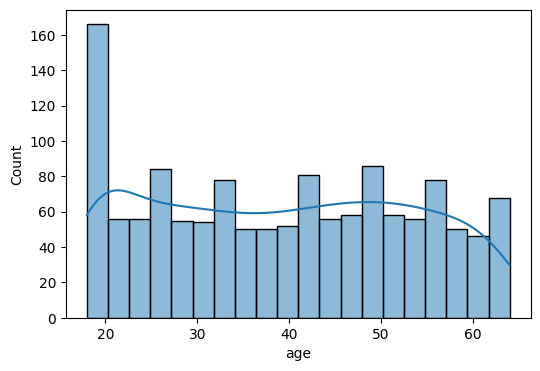

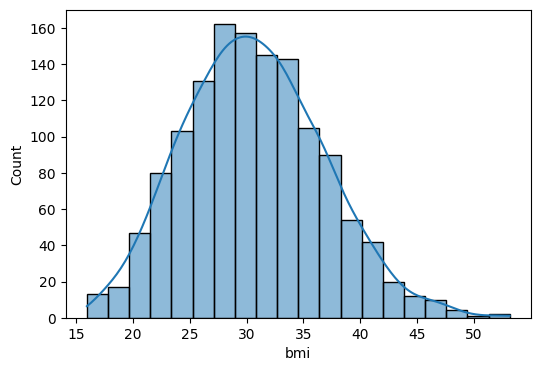

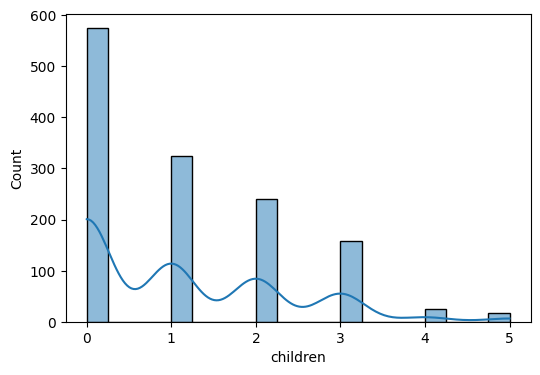

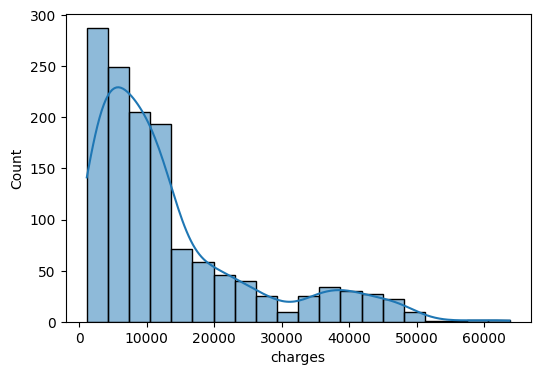

In [11]:
for col in Numeric_col:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], bins=20, kde=True)

In [12]:
Copy_df = df.copy()

In [13]:
Copy_df.drop_duplicates(inplace=True)

In [14]:
Copy_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
Copy_df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [16]:
Copy_df['sex'] = Copy_df['sex'].map({"male":0, "female":1})

In [17]:
Copy_df['smoker'] = Copy_df['smoker'].map({"no":0, "yes":1})

In [18]:
Copy_df.head()

age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520

In [19]:
Copy_df = pd.get_dummies(Copy_df,columns=['region'])

In [20]:
Copy_df.head()

age  sex     bmi  ...  region_northwest  region_southeast  region_southwest
0   19    1  27.900  ...             False             False              True
1   18    0  33.770  ...             False              True             False
2   28    0  33.000  ...             False              True             False
3   33    0  22.705  ...              True             False             False
4   32    0  28.880  ...              True             False             False

[5 rows x 10 columns]

In [21]:
Copy_df = Copy_df.astype(int)

In [22]:
Copy_df.head()

age  sex  bmi  ...  region_northwest  region_southeast  region_southwest
0   19    1   27  ...                 0                 0                 1
1   18    0   33  ...                 0                 1                 0
2   28    0   33  ...                 0                 1                 0
3   33    0   22  ...                 1                 0                 0
4   32    0   28  ...                 1                 0                 0

[5 rows x 10 columns]

In [23]:
Copy_df['Cat_bmi'] = pd.cut (Copy_df['bmi'],
                             bins = [0,18.5,24.9,29.9,float('inf')],
                             labels= ['under','normal','over','obese'])

In [24]:
Copy_df.head()

age  sex  bmi  ...  region_southeast  region_southwest  Cat_bmi
0   19    1   27  ...                 0                 1     over
1   18    0   33  ...                 1                 0    obese
2   28    0   33  ...                 1                 0    obese
3   33    0   22  ...                 0                 0   normal
4   32    0   28  ...                 0                 0     over

[5 rows x 11 columns]

In [25]:
Copy_df = pd.get_dummies(Copy_df, columns=['Cat_bmi'])

In [26]:
Copy_df= Copy_df.astype(int)

In [27]:
Copy_df.head()

age  sex  bmi  ...  Cat_bmi_normal  Cat_bmi_over  Cat_bmi_obese
0   19    1   27  ...               0             1              0
1   18    0   33  ...               0             0              1
2   28    0   33  ...               0             0              1
3   33    0   22  ...               1             0              0
4   32    0   28  ...               0             1              0

[5 rows x 14 columns]

In [28]:
Copy_df = Copy_df.drop('bmi', axis=1)

In [29]:
Copy_df.head()

age  sex  children  ...  Cat_bmi_normal  Cat_bmi_over  Cat_bmi_obese
0   19    1         0  ...               0             1              0
1   18    0         1  ...               0             0              1
2   28    0         3  ...               0             0              1
3   33    0         0  ...               1             0              0
4   32    0         0  ...               0             1              0

[5 rows x 13 columns]

In [30]:
Copy_df.shape

(1337, 13)

In [31]:
from sklearn.preprocessing import StandardScaler
Columns =['age','children']
scaler = StandardScaler()
Copy_df[Columns]=scaler.fit_transform(Copy_df[Columns])

In [32]:
Copy_df.head()

age  sex  children  ...  Cat_bmi_normal  Cat_bmi_over  Cat_bmi_obese
0 -1.440418    1 -0.909234  ...               0             1              0
1 -1.511647    0 -0.079442  ...               0             0              1
2 -0.799350    0  1.580143  ...               0             0              1
3 -0.443201    0 -0.909234  ...               1             0              0
4 -0.514431    0 -0.909234  ...               0             1              0

[5 rows x 13 columns]

In [33]:
from scipy.stats import pearsonr
selected_features = [
    'age', 'children', 'sex', 'smoker','region_northeast',
    'region_northwest', 'region_southeast', 'region_southwest',
    'Cat_bmi_under', 'Cat_bmi_normal', 'Cat_bmi_over','Cat_bmi_obese'
]

In [34]:
correlation ={
    feature: pearsonr(Copy_df[feature], Copy_df['charges'])[0]
    for feature in selected_features
}

In [35]:
Corr_data = pd.DataFrame(list(correlation.items()), columns=['Feature', 'P_Value'])

In [36]:
Corr_data.sort_values(by='P_Value', ascending=False)

Feature   P_Value
3             smoker  0.787234
0                age  0.298309
11     Cat_bmi_obese  0.200348
6   region_southeast  0.073577
1           children  0.067390
4   region_northeast  0.005946
5   region_northwest -0.038695
7   region_southwest -0.043637
8      Cat_bmi_under -0.050599
2                sex -0.058046
9     Cat_bmi_normal -0.104042
10      Cat_bmi_over -0.120601

In [37]:
from scipy.stats import chi2_contingency
import pandas as pd


In [38]:
selected_features = [
    'age', 'children', 'sex', 'smoker','region_northeast',
    'region_northwest', 'region_southeast', 'region_southwest',
    'Cat_bmi_under', 'Cat_bmi_normal', 'Cat_bmi_over','Cat_bmi_obese'
]

alpha = 0.05



In [39]:
Copy_df['charges_bin'] = pd.qcut(Copy_df['charges'], q=4, labels=False)
chi2_results = {}

In [40]:
for col in selected_features:
    contingency = pd.crosstab(Copy_df[col], Copy_df['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Keep Feature' if p_val < alpha else 'Drop Feature'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

chi2_statistic   p_value      Decision
age                  1509.13025       0.0  Keep Feature
smoker               848.219178       0.0  Keep Feature
children             138.659313       0.0  Keep Feature
region_southeast      15.998167  0.001135  Keep Feature
sex                   10.258784   0.01649  Keep Feature
Cat_bmi_obese          8.515711  0.036473  Keep Feature
region_northeast       6.438442  0.092122  Drop Feature
region_southwest       5.091893  0.165191  Drop Feature
Cat_bmi_over            4.25149  0.235557  Drop Feature
Cat_bmi_normal         3.708088   0.29476  Drop Feature
Cat_bmi_under           3.37403  0.337471  Drop Feature
region_northwest        1.13424  0.768815  Drop Feature

In [41]:
Final_df = Copy_df[['age','children','sex','smoker','region_southeast','Cat_bmi_obese','charges']]

In [42]:
Final_df.head()

age  children  sex  smoker  region_southeast  Cat_bmi_obese  charges
0 -1.440418 -0.909234    1       1                 0              0    16884
1 -1.511647 -0.079442    0       0                 1              1     1725
2 -0.799350  1.580143    0       0                 1              1     4449
3 -0.443201 -0.909234    0       0                 0              0    21984
4 -0.514431 -0.909234    0       0                 0              0     3866

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X= Final_df.drop('charges', axis =1)
y= Final_df['charges']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

0.800262026540908

In [53]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [54]:
adjusted_r2

0.7956703489901242